# Movie Box Office Predicitons for ClearFiction

## Outline of Approach

* Load data from csv. This is the data which is output from the R program
* Take a look at the data/features
* Redo the bag of words
* Normalize? (explain what it is and why it matters)
* Regularize? (explain what it is and why it matters)
* Run a simple decision tree/random forrest to get an idea of most important features


In [1]:
import numpy as np
import pandas as pd


In [2]:
cf = pd.read_csv('../csv/cf.csv')

In [3]:
cf.head()

,Movie.ID,TITLE,LogBox,logROI,LogBudget,BUDGET,BOX,scrCnt,GENRE_DRA,GENRE_ROM,...,avgBuild,avgLockIn,avgResolut,avgBelieve,avgSurpEnd,NSCENE,INTPREC,WF1,WF2,predBox
0,1,10 Things I Hate About You,3.962927,0.215693,3.747234,42.403613,52.611076,2311,1,1,...,1.600000,1.600000,1.800000,2.000000,1.400000,90,0.766667,-4.049585,8.135803,34.279692
1,2,12 Monkeys,4.426234,0.353349,4.072884,58.726112,83.615909,1629,0,0,...,1.833333,1.333333,1.500000,1.666667,1.666667,173,0.728324,-34.581778,3.002470,46.825672
2,3,12 Years a Slave,4.037207,0.433341,3.603866,36.740000,56.667870,1474,1,0,...,1.857143,1.571429,1.857143,1.857143,1.285714,150,0.360000,37.276544,11.832344,29.061503
3,5,15 Minutes,3.454327,-0.900061,4.354388,77.819170,31.636980,2337,1,0,...,1.857143,1.571429,2.000000,1.857143,1.714286,71,0.676056,-28.015823,-6.061404,70.334992
4,6,17 Again,4.229052,0.059979,4.169073,64.655511,68.652110,3255,1,1,...,1.800000,1.600000,1.600000,1.800000,1.400000,117,0.683761,52.569715,-4.846865,53.088286


In [4]:
# I'm going to drop a few columns such as log budget, box, and ROI
# first let's take a look at all features
list(cf.columns.values)

['Movie.ID',
 'TITLE',
 'LogBox',
 'logROI',
 'LogBudget',
 'BUDGET',
 'BOX',
 'scrCnt',
 'GENRE_DRA',
 'GENRE_ROM',
 'GENRE_THR',
 'GENRE_COM',
 'GENRE_HOR',
 'GENRE_SCI',
 'GENRE_ACT',
 'GENRE_FAM',
 'NTITLE',
 'YEAR',
 'avgClrPrem',
 'avgImpPrem',
 'avgFamSet',
 'avgEarExp',
 'avgCoAvoid',
 'avgIntCon',
 'avgSurp',
 'avgAntici',
 'avgFlhback',
 'avgClrMot',
 'avgMulDim',
 'avgHeroW',
 'avgStrNem',
 'avgSymHero',
 'avgLogic',
 'avgCharGrow',
 'avgImp',
 'avgMulConf',
 'avgIntensity',
 'avgBuild',
 'avgLockIn',
 'avgResolut',
 'avgBelieve',
 'avgSurpEnd',
 'NSCENE',
 'INTPREC',
 'WF1',
 'WF2',
 'predBox']

In [5]:
drop_list = ['predBox', 'LogBox', 'logROI', 'LogBudget', 'WF1', 'WF2']
#cf.drop(drop_list)
cf.drop(drop_list, axis=1, inplace=True)

In [6]:
cf.head()

,Movie.ID,TITLE,BUDGET,BOX,scrCnt,GENRE_DRA,GENRE_ROM,GENRE_THR,GENRE_COM,GENRE_HOR,...,avgImp,avgMulConf,avgIntensity,avgBuild,avgLockIn,avgResolut,avgBelieve,avgSurpEnd,NSCENE,INTPREC
0,1,10 Things I Hate About You,42.403613,52.611076,2311,1,1,0,1,0,...,1.600000,1.600000,1.800000,1.600000,1.600000,1.800000,2.000000,1.400000,90,0.766667
1,2,12 Monkeys,58.726112,83.615909,1629,0,0,1,0,0,...,1.833333,1.833333,1.666667,1.833333,1.333333,1.500000,1.666667,1.666667,173,0.728324
2,3,12 Years a Slave,36.740000,56.667870,1474,1,0,0,0,0,...,2.000000,1.285714,1.857143,1.857143,1.571429,1.857143,1.857143,1.285714,150,0.360000
3,5,15 Minutes,77.819170,31.636980,2337,1,0,1,0,0,...,1.714286,1.571429,1.714286,1.857143,1.571429,2.000000,1.857143,1.714286,71,0.676056
4,6,17 Again,64.655511,68.652110,3255,1,1,0,1,0,...,2.000000,1.400000,1.800000,1.800000,1.600000,1.600000,1.800000,1.400000,117,0.683761


In [7]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = '../scripts'
wordlists = PlaintextCorpusReader(corpus_root, '.*\.txt')
wordlists.fileids()

['100_CELL.txt',
 '101_CELLULAR.txt',
 "102_CHARLIE'S ANGELS.txt",
 '103_CHASING AMY.txt',
 '104_CHILDREN OF MEN.txt',
 '105_CHRONICLES OF NARNIA LION, WITCH.txt',
 '106_CIDER HOUSE RULES.txt',
 '107_CINEMA PARADISO.txt',
 '108_CITY OF JOY.txt',
 '109_CLERKS.txt',
 '10_ABOVE THE LAW.txt',
 '110_CLIFFHANGER.txt',
 '111_COBB.txt',
 '112_COLD MOUNTAIN.txt',
 '113_COLLATERAL.txt',
 '114_COLLATERAL DAMAGE.txt',
 '115_COMMANDO.txt',
 '116_CONFIDENCE.txt',
 '117_CONSPIRACY THEORY.txt',
 '118_CONSTANTINE.txt',
 '119_CONTACT.txt',
 '11_ABSOLUTE POWER.txt',
 '120_COPYCAT.txt',
 '121_COURAGE UNDER FIRE.txt',
 '122_CRANK.txt',
 '123_CRASH.txt',
 '124_CROUCHING TIGER, HIDDEN DRAGON.txt',
 '125_CROUPIER.txt',
 '126_CROW.txt',
 '127_CRUEL INTENTIONS.txt',
 '128_DARK CITY.txt',
 '129_DAVE.txt',
 '12_ACE VENTURA PET DETECTIVE.txt',
 '130_DEAD POETS SOCIETY.txt',
 '131_DEATH TO SMOOCHY.txt',
 '132_DEEP COVER.txt',
 '133_DEEP RISING.txt',
 '134_DEER HUNTER.txt',
 '135_DEMOLITION MAN.txt',
 '136_DETROIT R

In [8]:
wordlists.words('95_BUTTERFLY EFFECT.txt')


['THE', 'BUTTERFLY', 'EFFECT', 'by', 'J', '.', ...]

In [9]:
wordlists.sents('95_BUTTERFLY EFFECT.txt')

[['THE', 'BUTTERFLY', 'EFFECT', 'by', 'J', '.', 'Mackye', 'Gruber', '&', 'Eric', 'Bress'], ['INT', '.'], ...]

In [10]:
import nltk
%matplotlib inline

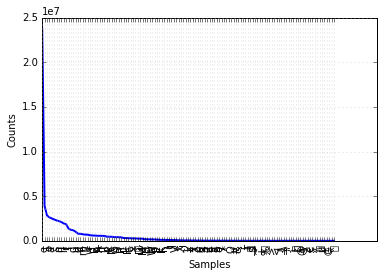

In [11]:
fd = nltk.FreqDist(wordlists.raw())
fd.plot()

In [12]:
cfd = nltk.ConditionalFreqDist(
    (script, word) 
    for script in  ['95_BUTTERFLY EFFECT.txt', '38_APOCALYPSE NOW.txt']
    for word in wordlists.words(script))

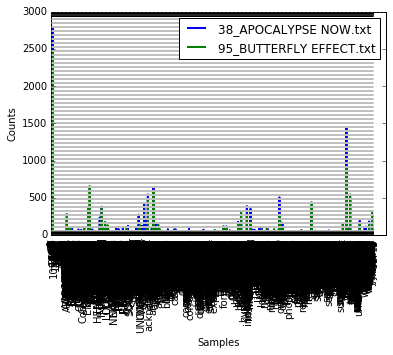

In [13]:
cfd.plot()

In [14]:
genre_word = [(script, word)
              for script in ['95_BUTTERFLY EFFECT.txt', '38_APOCALYPSE NOW.txt']
              for word in wordlists.words(script)]

In [15]:
len(genre_word)

67928

In [16]:
print(cfd['95_BUTTERFLY EFFECT.txt'])

<FreqDist with 4222 samples and 30436 outcomes>


In [17]:
print(cfd['38_APOCALYPSE NOW.txt'])

<FreqDist with 5147 samples and 37492 outcomes>


In [18]:
cfd['38_APOCALYPSE NOW.txt'].most_common(25)

[('.', 2799),
 ('the', 1450),
 (',', 1208),
 ('--', 913),
 ("'", 744),
 ('and', 638),
 ('a', 545),
 ('of', 505),
 ('to', 497),
 ('-', 478),
 ('WILLARD', 422),
 ('in', 389),
 ('I', 381),
 ('is', 351),
 ('(', 281),
 ('The', 275),
 ('s', 265),
 ('you', 254),
 ('it', 253),
 ('He', 235),
 ('?', 231),
 (')', 222),
 ('Willard', 209),
 ('his', 206),
 ('up', 191)]

In [19]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid)
    for fileid in ['10_ABOVE THE LAW.txt', '110_CLIFFHANGER.txt', '111_COBB.txt', '112_COLD MOUNTAIN.txt', '113_COLLATERAL.txt'
                   , '114_COLLATERAL DAMAGE.txt', '116_CONFIDENCE.txt', '117_CONSPIRACY THEORY.txt', '119_CONTACT.txt']
    for w in wordlists.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

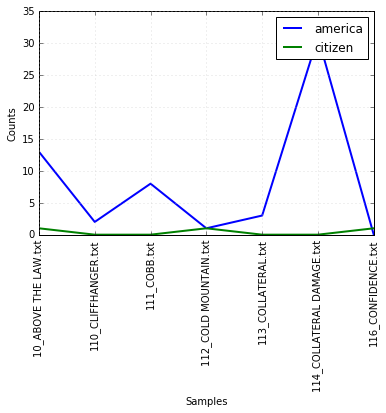

In [20]:
cfd.plot(samples=['10_ABOVE THE LAW.txt', '110_CLIFFHANGER.txt', '111_COBB.txt', '112_COLD MOUNTAIN.txt', '113_COLLATERAL.txt'
                   , '114_COLLATERAL DAMAGE.txt', '116_CONFIDENCE.txt'])

In [21]:
cfd.tabulate(samples=['10_ABOVE THE LAW.txt', '110_CLIFFHANGER.txt', '111_COBB.txt', '112_COLD MOUNTAIN.txt'])

         10_ABOVE THE LAW.txt   110_CLIFFHANGER.txt          111_COBB.txt 112_COLD MOUNTAIN.txt 
america                    13                     2                     8                     1 
citizen                     1                     0                     0                     1 


In [22]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [24]:
unusual_words(wordlists.words('10_ABOVE THE LAW.txt'))

['abandano',
 'abigcar',
 'accelerates',
 'accelerating',
 'accepts',
 'accompanied',
 'acknowledges',
 'acres',
 'addicts',
 'adds',
 'adjusting',
 'admin',
 'admires',
 'agencies',
 'agents',
 'ages',
 'agonies',
 'agrees',
 'ahhing',
 'aif',
 'aims',
 'ain',
 'airlines',
 'aisles',
 'alleged',
 'alleys',
 'allowing',
 'alspauch',
 'alspaugh',
 'altshuler',
 'ambled',
 'ambulances',
 'americans',
 'animals',
 'ankles',
 'announcing',
 'answers',
 'antennas',
 'apes',
 'appears',
 'applying',
 'approaches',
 'appropriations',
 'aren',
 'arrived',
 'arrives',
 'arriving',
 'arteries',
 'artists',
 'arts',
 'ashtray',
 'ashtrays',
 'asia',
 'asking',
 'asks',
 'assailants',
 'assassins',
 'asshole',
 'assholes',
 'assitant',
 'associating',
 'atf',
 'atrocities',
 'attackers',
 'attacks',
 'audiocassettes',
 'aunts',
 'averts',
 'babies',
 'babysit',
 'backhands',
 'backlit',
 'backs',
 'backyard',
 'bags',
 'bandaged',
 'bandages',
 'baptized',
 'barrels',
 'bars',
 'bashed',
 'bastard

In [26]:
from nltk.corpus import stopwords
len(set(stopwords.words()))

2117

In [27]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [28]:
content_fraction(wordlists.words('10_ABOVE THE LAW.txt'))

0.6898690174921438